In [1]:
from iPython import markdown

ModuleNotFoundError: No module named 'iPython'

# Lab 1 - Conservation d'une population d'otaries

Une organisation de conservation de la nature s'intéresse à une colonie d'otaries et souhaite que celle-ci atteigne environ 100 individus dans 20 ans sur une ile du Pacifique.  Comme les investissements pour la conservation de la nature sont rares et difficiles à obtenir, ceux-ci seront considérées comme gaspillées si l'action de conservation ne se déroule pas comme prévu, c'est à dire si la population globale est plus faible ou plus importante que celle initialement visée. 

Par conséquent, la question est de définir comment agir sur les paramètres démographiques de cette population afin d'atteindre la taille de population souhaitée en 20 ans. Cette question peut être reformulée en un problème de modélisation mathématique et de recherche de valeur d'un certain paramètre du modèle. En particulier, dans cet exemple on souhaite trouver la valeur du paramètre qui minimise la distance entre notre cible et la taille de la population simulée. 

Pour modéliser l'évolution de la population, nous supposons ici qu'il est possible de la représenter comme une population structurée par sous-groupes, actuellement composée de 11 petits de l'année, 9 juvéniles et 30 adultes. 

Soit $ \mathit{N}$ le vecteur contenant la distribution des sous-groupes de populations $$\mathit{N} = (\begin{matrix} n_b & n_j & n_a \end{matrix}) $$

Pour chaque pas de temps, on pose : 
$$ N_{i+1} = \mathbf{A} N_{i+1}$$


On note la matrice de transition $A$ ainsi :

$$ A = \left[ \begin{matrix} 0 & 0 & F \\ G_p & S_j & 0 \\ 0 & G_j & S_a \end{matrix}  \right]$$

ave $G_p$ , $S_j$, $G_j$, $S_a$, et $F$ les probabilités de changement de groupe suivantes :

- $F=0.530$ : le taux de fécondité par individu adulte
- $G_p=0.856$ : les petites otaries de l'année deviennent des juvéniles (taux de maturation)
- $S_j=0.200$ : les juvéniles restent juvéniles (S: taux de survie)
- $G_j=0.389$ : les juvéniles deviennent des adultes (taux de maturation)
- $S_a=0.645$ : les adultes restent adultes (S: taux de survie adulte)

Les valeurs de ces paramètres ont été estimées sur des populations d'otaries dans des environnement similaires à celui de notre cas d'étude par Wielgus et al. [3].

Pour cet exercice, on va s'intéresser uniquement au paramètre de fécondité et on souhaite trouver la valeur optimale de ce paramètre $F$ en supposant les autres constants. 

### Stratégie de résolution du problème

On va résoudre le problème en le décomposant en deux sous-problèmes: 
- Le premier sous-problème est de concevoir un programme capable de prédire l'évolution de la population pour n'importe quelle valeur de $F$.
- Le second sous-problème consiste à chercher la valeur de $F$ telle que la population atteint l'objectif recherché.


L'objectif de cet exercice est de résoudre le premier sous-problème : simuler l'évolution de la population. Dans un deuxième temps, nous chercherons la valeur de $F$ optimale.

### Simulation de l'évolution de la population

**Question 1 (30 %)**. On vous demande d'utiliser le modèle conceptuel décrit ci-dessus pour estimer l'évolution de la population pour les 20 prochaines années sur la base des paramètres démographiques fournis.

Les étapes de calcul sont les suivantes :
- A) Créer la matrice de transition $\mathbf{A}$ avec les paramètres démographiques données, et la valeur de $F$ choisie par l'utilisateur.
- B) Initialiser le vecteur $\mathit{N}$ contenant le nombre d'individus dans chaque classe d'âge au début de la simulation.
- C) Pour les années 1 à 20, mettre à jour le vecteur $\mathit{N}$ en calculant le produit $\mathit{N}_{i+1} = \mathbf{A}\mathit{N}_{i}$.
- D) Calculer la somme du nombre d'individus à chaque étapes et renvoyer les résultats, visualisez les sur un graphe.

Que déduisez-vous de ce calcul ? 

**Remarque:** Utilisez la cellule ci-dessous pour commencer à répondre à la question. Vous pouvez créer autant de cellules supplémentaires que vous le souhaitez. Soyez conscients qu'il existe plusieurs façons de faire le calcul correctement. Essayez de réfléchir et de trouver la solution par vous mêmes. C'est ainsi que l'on retient le mieux. Vous ferez peut-être des erreurs, mais c'est comme cela que l'on apprend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Remarque de l'étudiant**: Tout au long du lab je pars du principe que l'on n'arrondi pas $n_b$ $n_j$ et $n_a$ lors du calcul de $N_{i+1}$. Cependant, il est clair qu'avoir 5.3 otaries en pratique fait peu sens. En faisant les tests, je suis arrivé à une conclusion lègerement différente pour la deuxième partie du lab en faisant l'arrondi. J'ai donc décidé de ne pas arrondir, car dans notre cas on utlise des méthodes de résolution qui se basent sur un système d'équation continu. (Exemple de ce que j'insinue quand je parle d'arrondir : $n_b = 2.6$ -> $n_b = 2$). Le code pour arrondir est en commentaire. Bonne correction !

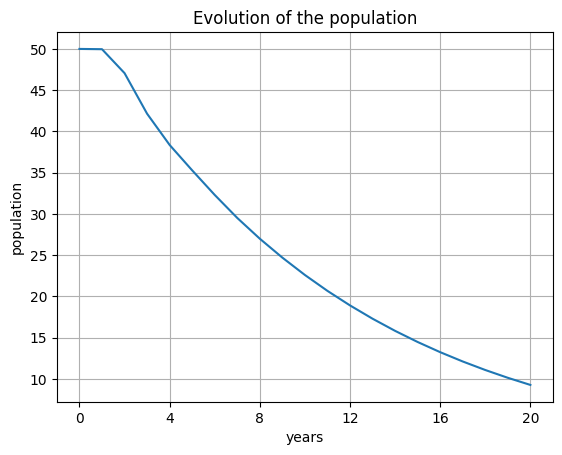

In [9]:
def predict_pop(F):
    Gp = 0.856
    Sj = 0.200
    Gj = 0.389
    Sa = 0.645
    
    nb = 11
    nj = 9
    na = 30
    A = np.array([
        [0, 0, F],
        [Gp, Sj, 0],
        [0, Gj, Sa]
    ])

    N = np.array([nb, nj, na])
    pop_pyear = np.zeros(21)
    pop_pyear[0] = N.sum()
    for i in range (1, 21):
        N = np.dot(A, N.T) # np.floor() pour arrondir
        pop_pyear[i] = N.sum()
    return pop_pyear

years = np.arange(0,21, 1)
population_p_y = predict_pop(0.530)
fig, ax = plt.subplots()
ax.plot(years, population_p_y)
ax.set_title('Evolution of the population')
ax.set_xlabel('years')
ax.set_ylabel('population')
plt.xticks(np.arange(min(years), max(years) + 1, 4.0))
ax.grid(True)

#### Discussion:
On constate une forte décroissance de population sur 20 ans. Le taux de fécondité est trop bas. La population tend vers l'extinction.

**Question 2 (30 %)**. On souhaite maintenant étudier l'évolution de la population en fonction du taux de fécondité. Nous devrons donc répéter les même calculs avec différentes valeurs de $F$, on vous demande donc d'écrire une fonction en python qui respecte les spécifications suivantes :
- Nom et syntaxe d'appel de la fonction  : `nt = popin20years( F )`
- Entrées : `F` le taux de fécondité 
- Sortie : $\mathit{N}$ le vecteur comprenant la répartition de la population âu bout de 20 ans.

Pour créer cette fonction, vous pouvez copier le bout de code écrit pour répondre à la question 1, l'encapsuler dans une fonction et l'adapter pour prendre en compte la valeur de $F$ qui n'est pas connue à l'avance.

L'objectif de conservation correspond à la population totale, que vous pouvez calculer à partir du vecteur $\mathit{N}$.

Testez votre fonction en l'applicant pour la valeur de $F$ utilisée précédemment, vous devriez retrouver la même valeur que précédemment. Essayez de changer $F$ et vérifier que le résultat change.

Comme précédemment, utilisez la cellule ci-dessous et rajoutez-en si vous le souhaitez pour coder votre solution. 

In [10]:
def popin20years(F : float, nt : int = 20) -> float:
    '''
    Calcule la répartition de population totale d'otaries après 20 ans
    en fonction du paramètre F.
    '''
    Gp = 0.856
    Sj = 0.200
    Gj = 0.389
    Sa = 0.645
    
    nb = 11
    nj = 9
    na = 30
    
    A = np.array([
        [0, 0, F],
        [Gp, Sj, 0], 
        [0, Gj, Sa]
    ])
    n = np.array([nb, nj, na])
    
    for i in range (nt):
        n = np.dot(A, n.T) # np.floor() pour arrondir
    
    return n

print(popin20years(0.53))
print(popin20years(0.9))

[2.36615534 2.83334324 4.08431582]
[23.58317423 24.90011099 26.48451901]


On remarque un changement dans les valeurs de $n_b$, $n_j$, $n_a$

**Question 3 (10 %)**. Faire un graphe représentant l'estimation de la population d'otaries dans 20 ans en fonction de valeurs de $F$ comprise entre 0.4 et 1.0. Que déduisez-vous de ce graphe ? Est-il possible de mettre en oeuvre la politique souhaitée par l'organisation de protection de la nature ?

Utilisez la cellule ci-dessous pour répondre.

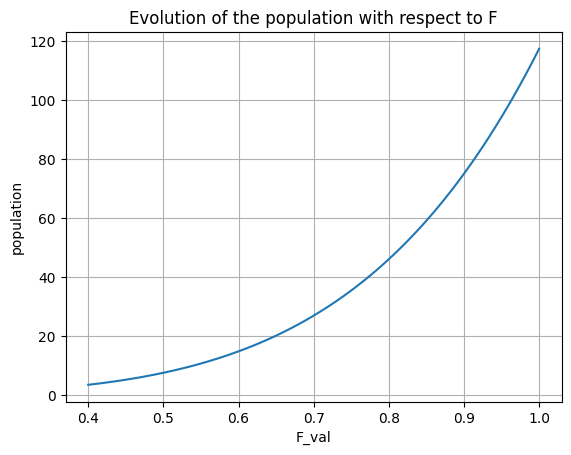

In [11]:
F_values = np.linspace(0.4,1, 100)
popin20years_byF = np.array([popin20years(F).sum() for F in F_values])
fig, ax = plt.subplots()
ax.plot(F_values, popin20years_byF)
ax.set_title('Evolution of the population with respect to F')
ax.set_xlabel('F_val')
ax.set_ylabel('population')
ax.grid(True)

#### Discussion:
On remarque une croissance de la population lorsque le taux de fécondité augmente.

Oui, c'est possible ! Effectivement on constate sur le graphe que la population d'otarie atteint les 100 individus avec un taux de fécondité autour de 0.95. L'objectif est donc en théorie bel et bien atteignable.

### Recherche du taux de fertilité optimal

**Question 4 (30 %)**. Définir la fonction que vous souhaitez résoudre et utilisez une méthode de résolution d'équation non linéaire pour trouver le taux de fertilité optimal. Quelle valeur obtenez-vous ? Commentez votre résultat.

In [12]:
def derive(f,x,dx=1e-5):
    """Calcule la dérivée f'(x) centrée au point x par la méthode des incréments."""
    return ( f( x + dx ) - f( x - dx ) ) / ( 2 * dx )

def newton(f, x0, eps = 1e-5, kmax = 1000, verbose = False):
    """Résolution d'une équation non linéaire par méthode de Newton 
    
    Parametres
    ----------
    f : fonction appelable par python ``f(x)`` 
        La fonction à résoudre, on cherche x, tel que f(x)=0
    a, b : float
        Valeur minimum et maximum de x entre lesquelles on cherche une solution    
    eps : float
        Valeur de l'erreur acceptable sur la solution
    kmax : int
        Nombre maximum d'itérations
        
    Retourne
    --------
    x : float
        Valeur x telle que f(x)=0
    k : int
        Le nombre d'itérations qui ont été nécessaire pour trouver x
    
    """
    
    tolerance = eps**2 # Pour éviter de calculer le carré à chaque itération
    if verbose:
        print("valeur initiale:")
        print("  x:",x0,"f(x):",f(x0))

    for k in range(1,kmax):
        step = f(x0)/derive(f,x0) 
        x1 = x0 - step    
        if verbose:
            print("iteration:",k)
            print("  x:",x1,"f(x):",f(x1))  
        if step**2 < tolerance:
            return x1, k
        x0 = x1
    
    return x1, k    


In [13]:
from scipy.optimize import fsolve 
def f(F):
    return popin20years(F).sum() - 100
sol = fsolve(f, 0.95)[0]
sol_newton = newton(f, 0.95)[0]
print(f"Estimation de la solution trouvée avec fsolve : {sol}")
print(f"Vérification de la solution : {popin20years(sol).sum()}")
print(f"Estimation de la solution trouvée avec la méthode de Newton : {sol_newton}")
print(f"Vérification de la solution : {popin20years(sol_newton).sum()}")

Estimation de la solution trouvée avec fsolve : 0.9633822063399093
Vérification de la solution : 100.00000000003136
Estimation de la solution trouvée avec la méthode de Newton : 0.9633822063399093
Vérification de la solution : 100.00000000003136


/var/folders/kv/b1gslbxj1sb_wvrlx344hk780000gn/T/ipykernel_6679/1068931773.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A = np.array([


#### Discussion:
On remarque que le taux de fécondité doit être de ~96% afin que la population d'Otarie atteigne l'objectif de 100 individus en 20 ans. Je n'ai pas assez de connaissances sur sur le domaine, mais cela me semble assez peu raisonnable pour des animaux sauvages. Donc cet objectif à peu de chance d'être atteint en essayant d'impacter uniquement le taux de fécondité, il faudrait combiner une augmentation de ce taux et une augmentation du taux de survie des juvéniles par exemple.
